In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
train_data=pd.read_csv("train.csv",index_col=[0])
test_data=pd.read_csv("test.csv",index_col=[0])

In [3]:
train_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
PassengerId,,,,,,,,,,,,
0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


<AxesSubplot:ylabel='PassengerId'>

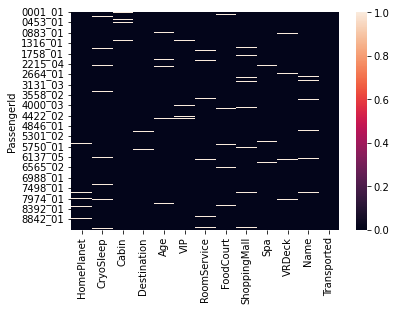

In [6]:
sns.heatmap(train_data.isnull())

In [7]:
a=train_data.columns

In [8]:
for i in a:
    print(f"{i}\n{train_data[i].isna().sum()}")

HomePlanet
201
CryoSleep
217
Cabin
199
Destination
182
Age
179
VIP
203
RoomService
181
FoodCourt
183
ShoppingMall
208
Spa
183
VRDeck
188
Name
200
Transported
0


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


In [10]:
Y=train_data["Transported"]
Y=Y.astype("int")

In [11]:
Y

PassengerId
0001_01    0
0002_01    1
0003_01    0
0003_02    0
0004_01    1
          ..
9276_01    0
9278_01    0
9279_01    1
9280_01    0
9280_02    1
Name: Transported, Length: 8693, dtype: int32

In [12]:
train_data.drop("Transported",axis=1,inplace=True)

In [13]:
train_data.drop("Name",axis=1,inplace=True)

In [14]:
train_data

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
PassengerId,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0
9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0
9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0


In [15]:
s=train_data.dtypes=="object"

In [16]:
cols=list(s[s].index)

In [17]:
cols

['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

In [18]:
test_data.drop("Name",axis=1,inplace=True)


In [19]:
train_data.columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')

In [20]:
test_data.columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')

In [21]:
cols

['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

In [22]:
for i in cols:
    print(train_data[i].isna().sum())

201
217
199
182
203


In [23]:
for i in cols:
    print(test_data[i].isna().sum())

87
93
100
92
93


In [24]:
for i in cols:
    a=train_data[i].mode()
    train_data=train_data.fillna(value=a)

In [25]:
for i in cols:
    print(train_data[i].isna().sum())

201
217
199
182
203


In [26]:
a=train_data["HomePlanet"].mode()
train_data["HomePlanet"]=train_data["HomePlanet"].fillna(value=f"{a}")

In [27]:
train_data["HomePlanet"].isna().sum()

0

In [28]:
for i in cols:
    a=train_data[i].mode()
    train_data[i]=train_data[i].fillna(value=f"{a}")

In [29]:
for i in cols:
    a=test_data[i].mode()
    test_data[i]=test_data[i].fillna(value=f"{a}")

In [30]:
test_data.isnull().sum()

HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age              91
VIP               0
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [31]:
train_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
PassengerId,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0


In [32]:
test_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
PassengerId,,,,,,,,,,,
0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


## checking for the floate cols

In [33]:
d=train_data.dtypes=="float64"

In [34]:
colsf=list(d[d].index)

In [35]:
colsf

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [36]:
for i in colsf:
    print(train_data[i].isna().sum())

179
181
183
208
183
188


In [37]:
for i in colsf:
    print(test_data[i].isna().sum())

91
82
106
98
101
80


In [38]:
for i in colsf:
    a=train_data[i].mean()
    train_data[i]=train_data[i].fillna(value=a)

In [39]:
train_data[colsf].isna().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [40]:
for i in colsf:
    a=test_data[i].mean()
    test_data[i]=test_data[i].fillna(value=a)

In [41]:
train_data[colsf].isna().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [42]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 0013_01 to 9277_01
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   object 
 1   CryoSleep     4277 non-null   object 
 2   Cabin         4277 non-null   object 
 3   Destination   4277 non-null   object 
 4   Age           4277 non-null   float64
 5   VIP           4277 non-null   object 
 6   RoomService   4277 non-null   float64
 7   FoodCourt     4277 non-null   float64
 8   ShoppingMall  4277 non-null   float64
 9   Spa           4277 non-null   float64
 10  VRDeck        4277 non-null   float64
dtypes: float64(6), object(5)
memory usage: 401.0+ KB


In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
std=LabelEncoder()

In [53]:
for i in cols:
    
    train_data[i]=std.fit_transform(train_data[i])

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['bool', 'str']

In [117]:
train_data1=train_data.copy()

In [118]:
train_data1["CryoSleep"].unique()

array([False, True, '0    False\nName: CryoSleep, dtype: object'],
      dtype=object)

In [119]:
train_data1["CryoSleep"]=train_data1["CryoSleep"].replace("0    False\nName: CryoSleep, dtype: object",False)

In [120]:
train_data1["CryoSleep"].unique()

array([False,  True])

In [121]:
train_data1["VIP"].unique()

array([False, True, '0    False\nName: VIP, dtype: object'], dtype=object)

In [124]:
train_data1["VIP"]=train_data1["VIP"].replace("0    False\nName: VIP, dtype: object",False)

In [125]:
train_data1["VIP"].unique()

array([False,  True])